In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

2025-07-01 11:49:04.546712: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 11:49:04.548131: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 11:49:04.551527: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 11:49:04.560621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751370544.580662   67672 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751370544.58

In [2]:
# load data

kiwo_df = pd.read_csv('/workspaces/Bakery_predictions/Kaggle_challenge_data/kiwo.csv')
test_df = pd.read_csv('/workspaces/Bakery_predictions/Kaggle_challenge_data/test.csv')
wetter_df = pd.read_csv('/workspaces/Bakery_predictions/Kaggle_challenge_data/wetter.csv')
train_df = pd.read_csv('/workspaces/Bakery_predictions/Kaggle_challenge_data/train.csv')

# print data
print("Kiwo data: \n",kiwo_df.head())
print("Test data: \n",test_df.head())
print("Wetter data: \n",wetter_df.head())
print("Train data: \n",train_df.head())

Kiwo data: 
         Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
Test data: 
         id       Datum  Warengruppe
0  1808011  2018-08-01            1
1  1808021  2018-08-02            1
2  1808031  2018-08-03            1
3  1808041  2018-08-04            1
4  1808051  2018-08-05            1
Wetter data: 
         Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
Train data: 
         id       Datum  Warengruppe      Umsatz
0  1307011  2013-07-01            1  148.828353
1  1307021  2013-07-02            1  159.7937

In [3]:
# merge data
# merge train_df with kiwo_df on Datum
m_train_ki = pd.merge(train_df, kiwo_df, on='Datum', how='left')
m_train_ki_wet = pd.merge(m_train_ki, wetter_df, on='Datum', how='left')

# merge test_df with kiwo_df on Datum
m_test_ki = pd.merge(test_df, kiwo_df, on='Datum', how='left')
m_test_ki_wet = pd.merge(m_test_ki, wetter_df, on='Datum', how='left')

# print merged data
print("Merged train data: \n",m_train_ki_wet.head())
print("Merged test data: \n",m_test_ki_wet.head())

Merged train data: 
         id       Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  \
0  1307011  2013-07-01            1  148.828353          NaN         6.0   
1  1307021  2013-07-02            1  159.793757          NaN         3.0   
2  1307031  2013-07-03            1  111.885594          NaN         7.0   
3  1307041  2013-07-04            1  168.864941          NaN         7.0   
4  1307051  2013-07-05            1  171.280754          NaN         5.0   

   Temperatur  Windgeschwindigkeit  Wettercode  
0     17.8375                 15.0        20.0  
1     17.3125                 10.0         NaN  
2     21.0750                  6.0        61.0  
3     18.8500                  7.0        20.0  
4     19.9750                 12.0         NaN  
Merged test data: 
         id       Datum  Warengruppe  KielerWoche  Bewoelkung  Temperatur  \
0  1808011  2018-08-01            1          NaN         0.0     23.7625   
1  1808021  2018-08-02            1          NaN        

In [4]:
# check for missing values in merged data
print("Missing values in train data: \n",m_train_ki_wet.isnull().sum())
print("Missing values in test data: \n",m_test_ki_wet.isnull().sum())

Missing values in train data: 
 id                        0
Datum                     0
Warengruppe               0
Umsatz                    0
KielerWoche            9111
Bewoelkung               70
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2325
dtype: int64
Missing values in test data: 
 id                        0
Datum                     0
Warengruppe               0
KielerWoche            1785
Bewoelkung               65
Temperatur               65
Windgeschwindigkeit      65
Wettercode              337
dtype: int64


In [5]:
# data imputation by column 

# column: KielerWoche
# fill missing values with 0
m_train_ki_wet['KielerWoche'].fillna(0, inplace=True)
m_test_ki_wet['KielerWoche'].fillna(0, inplace=True)

# column: Bewoelkung


# column: Temperatur


# column: Windgeschwindigkeit


# column: Wettercode




/tmp/ipykernel_67672/1970555268.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  m_train_ki_wet['KielerWoche'].fillna(0, inplace=True)
/tmp/ipykernel_67672/1970555268.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [6]:
print("Missing values in train data: \n",m_train_ki_wet.isnull().sum(
    
))

Missing values in train data: 
 id                        0
Datum                     0
Warengruppe               0
Umsatz                    0
KielerWoche               0
Bewoelkung               70
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2325
dtype: int64


In [7]:
# set Datum to datetime 

m_train_ki_wet['Datum'] = pd.to_datetime(m_train_ki_wet['Datum'])
m_test_ki_wet['Datum'] = pd.to_datetime(m_test_ki_wet['Datum'])

In [8]:
#%pip install holidays

In [9]:
## create german holidays
from datetime import datetime
import holidays

ger_holidays = holidays.Germany()
print(ger_holidays.items())
# print dictionary of german holidays
print("German holidays: \n",ger_holidays.items())

for key, value in holidays.Germany().items():

    print(key, value)

dict_items([])
German holidays: 
 dict_items([])


In [10]:
#check if Datum is a holiday in german holidays
m_train_ki_wet['Is_Holiday'] = m_train_ki_wet['Datum'].apply(lambda x: 1 if x in holidays.Germany() else 0)
m_test_ki_wet['Is_Holiday'] = m_test_ki_wet['Datum'].apply(lambda x: 1 if x in holidays.Germany() else 0)



# add weekdays and weekends as columns 

m_train_ki_wet['Wochentag'] = m_train_ki_wet['Datum'].dt.day_name()
m_test_ki_wet['Wochentag'] = m_test_ki_wet['Datum'].dt.day_name()

# add is_weekend column if yes add 1 else 0
for isweekend in m_train_ki_wet['Wochentag']:
    if isweekend == 'Saturday' or isweekend == 'Sunday':
        m_train_ki_wet['Is_Weekend'] = 1
    else:
        m_train_ki_wet['Is_Weekend'] = 0

for isweekend in m_test_ki_wet['Wochentag']:
    if isweekend == 'Saturday' or isweekend == 'Sunday':
        m_test_ki_wet['Is_Weekend'] = 1
    else:
        m_test_ki_wet['Is_Weekend'] = 0



# check if Datum is weekend and holidays at the same time

m_train_ki_wet['Is_WE_AND_Holiday'] = m_train_ki_wet.apply(lambda x: 1 if (x['Datum'] in holidays.Germany() and x['Wochentag'] == 'Saturday') else 0, axis=1)
m_test_ki_wet['Is_WE_AND_Holiday'] = m_test_ki_wet.apply(lambda x: 1 if (x['Datum'] in holidays.Germany() and x['Wochentag'] == 'Saturday') else 0, axis=1)


print("\n Train data: \n",m_train_ki_wet.head())
print("\n Test data: \n",m_test_ki_wet.head())


 Train data: 
         id      Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  \
0  1307011 2013-07-01            1  148.828353          0.0         6.0   
1  1307021 2013-07-02            1  159.793757          0.0         3.0   
2  1307031 2013-07-03            1  111.885594          0.0         7.0   
3  1307041 2013-07-04            1  168.864941          0.0         7.0   
4  1307051 2013-07-05            1  171.280754          0.0         5.0   

   Temperatur  Windgeschwindigkeit  Wettercode  Is_Holiday  Wochentag  \
0     17.8375                 15.0        20.0           0     Monday   
1     17.3125                 10.0         NaN           0    Tuesday   
2     21.0750                  6.0        61.0           0  Wednesday   
3     18.8500                  7.0        20.0           0   Thursday   
4     19.9750                 12.0         NaN           0     Friday   

   Is_Weekend  Is_WE_AND_Holiday  
0           0                  0  
1           0           

In [11]:
# datum min and max

print("Datum min and max in train data: \n",m_train_ki_wet['Datum'].min(), m_train_ki_wet['Datum'].max())
print("Datum min and max in test data: \n",m_test_ki_wet['Datum'].min(), m_test_ki_wet['Datum'].max())

Datum min and max in train data: 
 2013-07-01 00:00:00 2018-07-31 00:00:00
Datum min and max in test data: 
 2018-08-01 00:00:00 2019-07-30 00:00:00


In [ ]:
#%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#%pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Imputation of Temperatur
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from fancyimpute import IterativeImputer, KNN

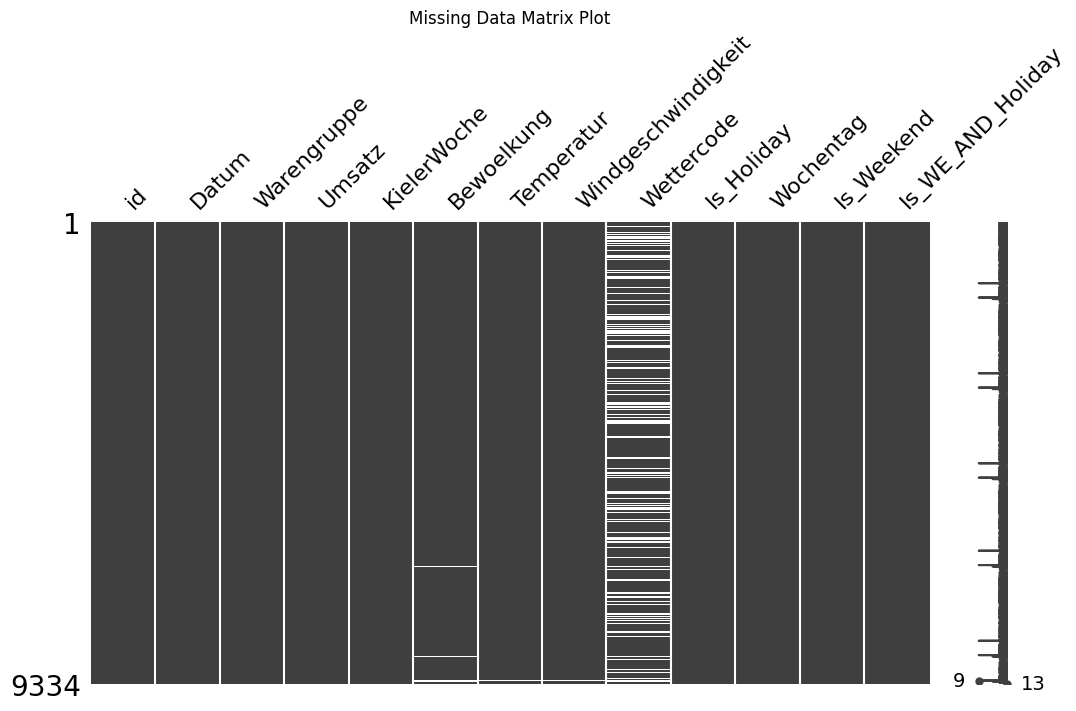

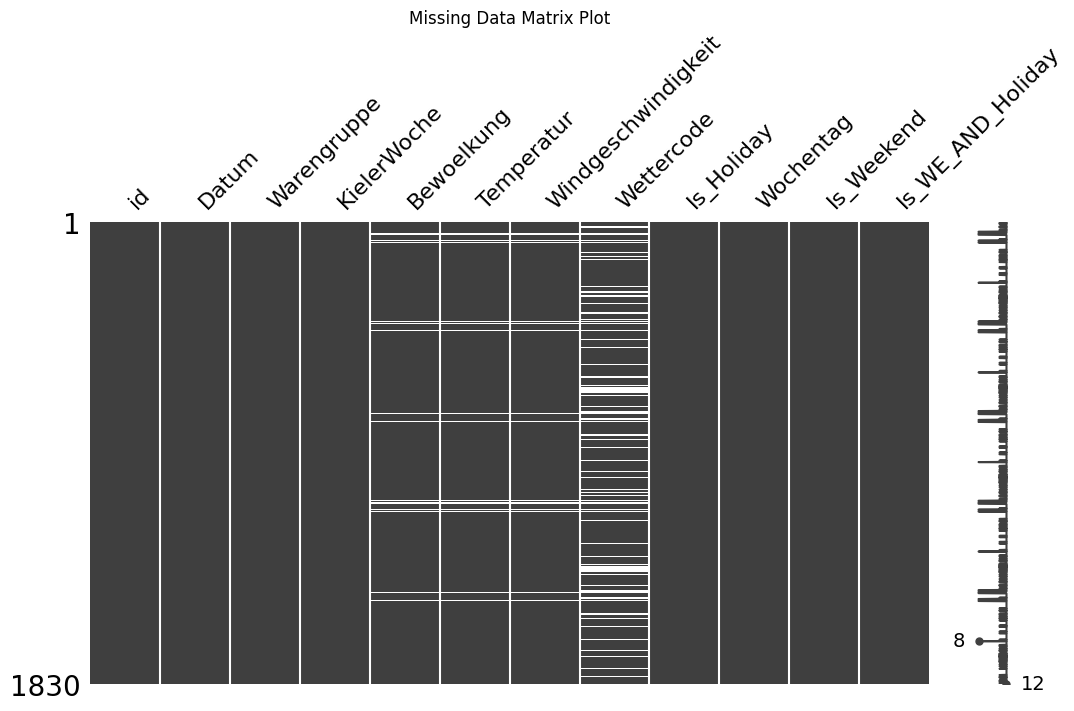

In [16]:
# Matrix plot of missing data
msno.matrix(m_train_ki_wet, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()


msno.matrix(m_test_ki_wet, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

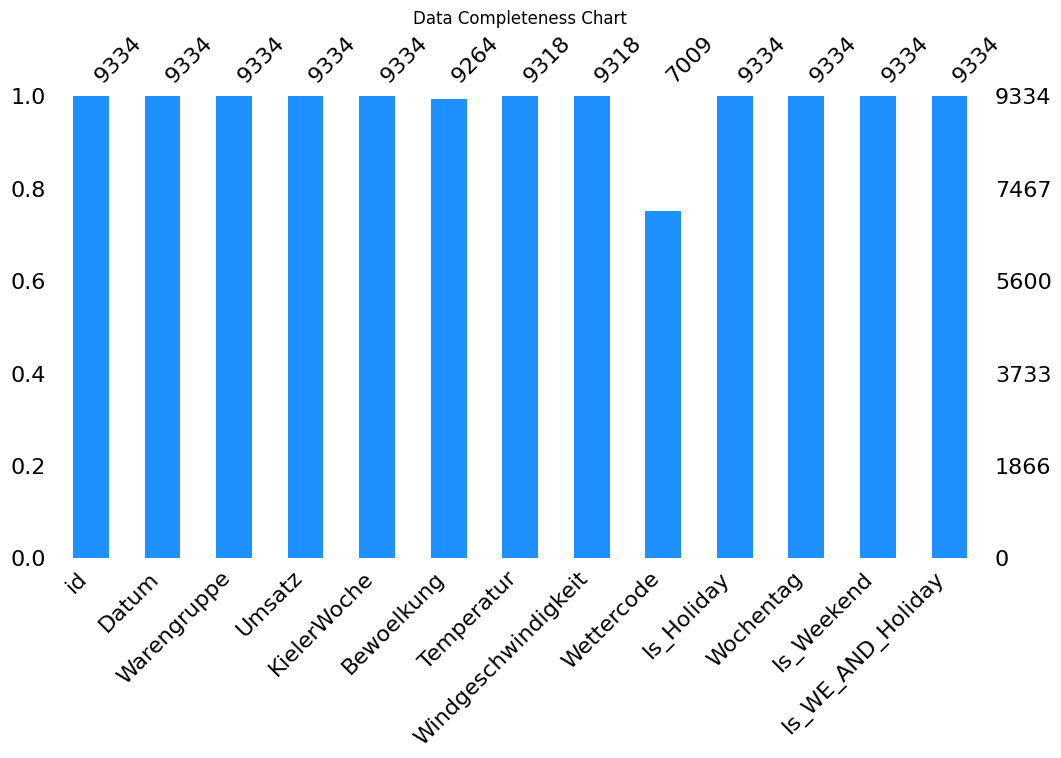

In [17]:
# Bar plot of complete data
msno.bar(m_train_ki_wet, color="dodgerblue", figsize=(12, 6))
plt.title('Data Completeness Chart')
plt.show()

In [20]:
%pip install dendrogram

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More in

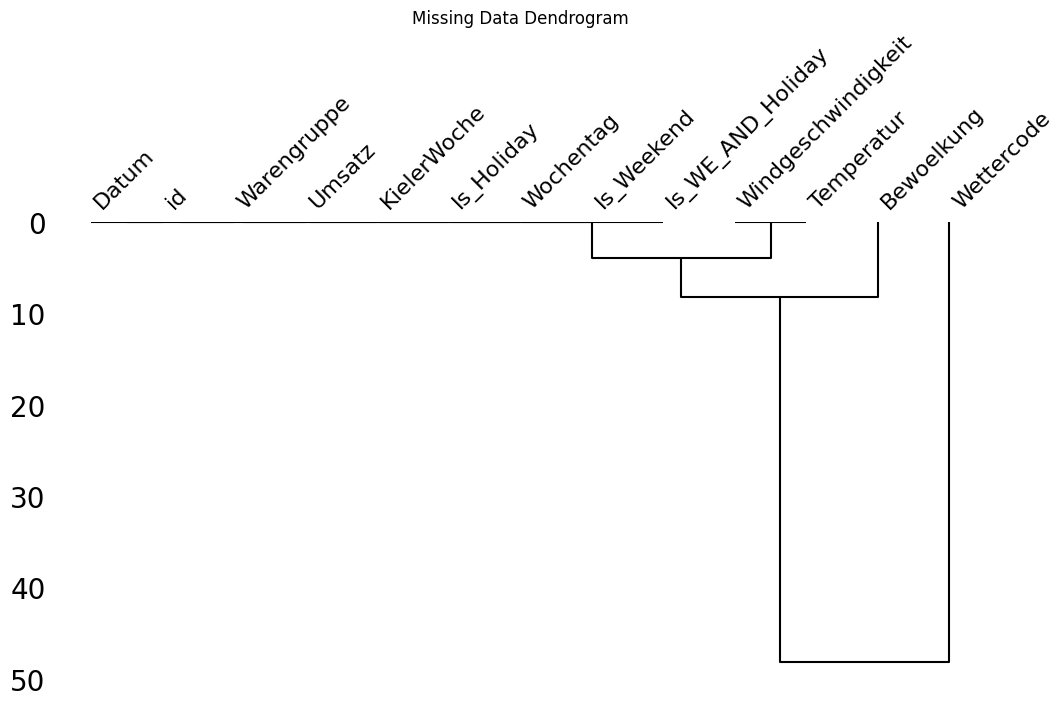

In [22]:
# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(m_train_ki_wet , figsize=(12, 6))
plt.title('Missing Data Dendrogram')
plt.show()

In [23]:
# Create a mask for the imputed values
mask = m_train_ki_wet['Temperatur'].isna()  # mask for missing values in 'Temperatur' column

In [26]:
# KNN imputation
imputer_knn = KNN()
# Only for the 'Temperatur' column
temp_knn = pd.DataFrame(
    imputer_knn.fit_transform(m_train_ki_wet['Temperatur'].values.reshape(-1, 1)),
    columns=['Temperatur']
)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/9334 with 0 missing, elapsed time: 4.216
Imputing row 101/9334 with 0 missing, elapsed time: 4.216
Imputing row 201/9334 with 0 missing, elapsed time: 4.216
Imputing row 301/9334 with 0 missing, elapsed time: 4.216
Imputing row 401/9334 with 0 missing, elapsed time: 4.217
Imputing row 501/9334 with 0 missing, elapsed time: 4.217
Imputing row 601/9334 with 0 missing, elapsed time: 4.217
Imputing row 701/9334 with 0 missing, elapsed time: 4.217
Imputing row 801/9334 with 0 missing, elapsed time: 4.217
Imputing row 901/9334 with 0 missing, elapsed time: 4.218
Imputing row 1001/9334 with 0 missing, elapsed time: 4.218
Imputing row 1101/9334 with 0 missing, elapsed time: 4.218
Imputing row 1201/9334 with 0 missing, elapsed time: 4.218
Imputing row 1301/9334 with 0 missing, elapsed time: 4.218
Imputing row 1401/9334 with 0 missing, elapsed time: 4.218
Imputing row 1501/9334 with 0 missing, elapsed time: 4.219
Imputing row 1601/9334 with 0 missing, elapsed time: 4.219
Imputing 

In [40]:
# print imputed data
print("Imputed data: \n",temp_knn.head())

Imputed data: 
    Temperatur
0     17.8375
1     17.3125
2     21.0750
3     18.8500
4     19.9750


In [42]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
temp_irmi = pd.DataFrame(imputer_irmi.fit_transform(m_train_ki_wet['Temperatur'].values.reshape(-1, 1)), columns=['Temperatur'])

# Primt imputed data
print("Imputed data: \n",temp_irmi.head())

Imputed data: 
    Temperatur
0     17.8375
1     17.3125
2     21.0750
3     18.8500
4     19.9750


In [28]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -20
    x_max = 100
    y_min = 50
    y_max = 100
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


In [37]:
#calculate mean temperature for each month and name column avg_temp_by_month 

avg_temp_by_month = m_train_ki_wet.groupby(m_train_ki_wet['Datum'].dt.month)['Temperatur'].mean()


print(avg_temp_by_month) #avg_temp_by_month

Datum
1      2.681689
2      3.848151
3      6.974391
4     10.884644
5     16.074372
6     18.674832
7     21.279404
8     20.131474
9     17.321703
10    12.757415
11     7.474901
12     5.501682
Name: Temperatur, dtype: float64


In [38]:
# rename avg_temp_by_month columns to month and avg_temp
avg_temp_by_month = avg_temp_by_month.reset_index()
avg_temp_by_month.columns = ['month', 'avg_temp']

print(avg_temp_by_month)

    month   avg_temp
0       1   2.681689
1       2   3.848151
2       3   6.974391
3       4  10.884644
4       5  16.074372
5       6  18.674832
6       7  21.279404
7       8  20.131474
8       9  17.321703
9      10  12.757415
10     11   7.474901
11     12   5.501682


In [46]:
# Plotting results for KNN imputation

plot_scatter_with_imputation(
    avg_temp_by_month, temp_knn,
    "avg_temp", 'Temperatur',  
    mask,
    'KNN Imputation Results',
    'Original Temperatur',
    'Imputed Temperatur')

KeyError: 'Temperatur'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plot_scatter_with_imputation(
    avg_temp_by_month, temp_knn,
    "avg_temp", 'Temperatur',  
    mask,
    'KNN Imputation Results',
    'Original Temperatur',
    'Imputed Temperatur'
)

KeyError: 'Temperatur'

<Figure size 1000x600 with 0 Axes>